# VAST Lightcurve Plotting

Because the ETA - V plot takes quite a while to complete, plus I've yet to figure how to create a Kernel Density Distribution for it just yet, this notebook is used to produce the lightcurve plots for VAST sources as a standalone. This may get deleted in the future, or incorporated into the "FINK Lightcurve Plotting" Notebook.

In [4]:
#bringing over the standard imports...
import os
import requests
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from vasttools.pipeline import Pipeline
from vasttools.query import Query
from bokeh.io import output_notebook
from bokeh.plotting import show
from astropy.coordinates import Angle, SkyCoord
from astropy import units as u
output_notebook()

Loading BokehJS ...

In [5]:
#should already be in the right directory for this one!
os.getcwd()

'/home/jovyan/work/Project_VAST_FINK'

In [6]:
#reading in the crossmatched sources pickle file
cmf = pd.read_pickle('Fink_2020_sources_matched_to_VAST_all_sources.pickle')

In [7]:
#Once again, defining the string lists for each family. 
#this one has split the "spectral" family into "Radio" and "Mutiwavelength"

AGN_Family=[
'AGN',
'AGN_Candidate',
'QSO',
'QSO_Candidate',
'Seyfert',
'Seyfert_1',
'Seyfert_2',
'Blazar',
'BLLac',
'Blazar_Candidate',
'RadioG',
'LINER'
]

Unknown_Family=[
'Unknown'
]

Galaxy_Family=[
'Galaxy',
'EmG',
'HII_G',
'GroupG',
'GinGroup',
'GinCl',
'GinPair',
'BClG',
'PartofG'
]

Stars_Family=[
'Star',
'RRLyr',
'Candidate_RRLyr',
'EB*',
'Candidate_EB*',
'WD*',
'LMXB',
'CataclyV*',
'low-mass*'
]

Supernovae_Family=[
'SN',
'SN candidate'
]

Radio_Family=[
'Radio',
'Radio(cm)'
]

Multiwavelength_Family=[
'Blue',
'UV',
'X'
]

Solar_System_Family=[
'Solar System',
'Solar System MPC',
'Solar System candidate',
]

In [9]:
Source_Families=[] #define an empty array
for i, row in cmf.iterrows(): #'i' represents the first index in cmf.iterrows, 'row' is the second
    x=row['class'] #this pulls out the class column from eachrow
    for j in AGN_Family: #for all the classes listed in the AGN family
        if x==j: #if it matches the class of the row
            Source_Families.append('AGN') #add 'AGN' to the empty array
    else: #otherwise, check the other families to see if it matches
        for j in Unknown_Family:
            if x==j:
                Source_Families.append('Unknown')
        else:
            for j in Galaxy_Family:
                if x==j:
                    Source_Families.append('Galaxy')
            else:
                for j in Stars_Family:
                    if x==j:
                        Source_Families.append('Star')
                else:
                    for j in Supernovae_Family:
                        if x==j:
                            Source_Families.append('Supernova')
                    else:
                        for j in Radio_Family:
                            if x==j:
                                Source_Families.append('Radio')
                        else:
                            for j in Multiwavelength_Family:
                                if x==j:
                                    Source_Families.append('Multiwavelength')
                            else:
                                for j in Solar_System_Family:
                                    if x==j:
                                        Source_Families.append('Solar System')
#the new column                                     
cmf['family']=Source_Families

As Im writing this, I'm wondering if I should just spend some time to write up a proper function for this proccess, so that I dont have to keep copy/pasting it over to every notebook

In [10]:
#printing family sizes for refference
print(cmf.groupby('family').size().sort_values(ascending=False))

family
AGN                827
Unknown            516
Galaxy             167
Solar System        81
Radio               70
Supernova           51
Multiwavelength     39
Star                21
dtype: int64


### Lightcurve Plotting Proper

In [13]:
#Here, we specify the family list we want to draw from
family_list=cmf.query('family == "Supernova"')

In [14]:
#This will automatically find the base directory that needed to be specified in method 1
pipe=Pipeline()
#this way, we can also load specific runs from the VAST pipeline:
my_run=pipe.load_run('tiles_corrected')

/opt/conda/lib/python3.9/site-packages/vasttools/pipeline.py:2609: UserWarning: Measurements have been loaded with vaex.
  warnings.warn("Measurements have been loaded with vaex.")


In [15]:
#since matched id list is a list of strings, astype() converts them into intergers first
matched_ids=family_list['matched_id'].astype('int64').to_list()

In [16]:
#locating sources in the 'tiles_corrected' run that have the same id
my_sources=my_run.sources.loc[matched_ids]
my_sources

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,n_neighbour_dist,vs_abs_significant_max_peak,m_abs_significant_max_peak,vs_abs_significant_max_int,m_abs_significant_max_int,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
3247514,298.485427,2.068151,1.754479,25.113852,51.204381,0.000092,0.000092,24.700400,14.088300,15.578000,...,0.020036,0.000000,0.000000,0.000000,0.000000,10,10,0,0,0
3737714,48.237637,-10.276692,1.133116,7.787402,15.069767,0.000102,0.000102,13.432327,12.047054,13.924000,...,0.084986,0.000000,0.000000,0.000000,0.000000,11,10,1,0,0
3181790,331.398656,-8.367385,1.296548,5.223650,9.602362,0.000147,0.000147,2.430900,1.906300,2.439000,...,0.013494,0.000000,0.000000,0.000000,0.000000,10,10,0,0,0
4128194,203.077119,-5.295297,1.685826,59.379775,105.370834,0.000099,0.000099,43.957375,26.128625,27.772000,...,0.008492,4.879821,0.095565,10.721761,0.386848,8,8,0,8,0
3733243,327.677999,-9.708212,1.078696,519.187592,686.021912,0.000088,0.000088,382.697101,354.816701,369.587000,...,0.000133,28.857164,0.070602,35.173362,0.133691,10,10,0,2,1
3937443,60.148046,-7.447927,1.054288,9.559252,19.901961,0.000098,0.000098,4.281727,4.051000,5.072000,...,0.042691,4.377175,0.406072,0.000000,0.000000,11,11,0,0,0
3523122,297.667918,-7.338789,1.043217,25.354167,36.198777,0.000087,0.000087,11.967545,11.480273,13.519000,...,0.005666,4.636937,0.218685,0.000000,0.000000,11,11,0,1,0
3394836,38.875342,-9.353960,1.464699,4.430730,5.059880,0.000101,0.000101,2.044357,1.802557,2.210543,...,0.059644,0.000000,0.000000,0.000000,0.000000,10,3,7,0,0
3236991,137.194993,-4.320237,11.632700,4.801120,5.911111,0.000097,0.000097,4.418526,-0.865474,3.187333,...,0.001722,14.065258,50.759680,14.065258,50.759680,11,3,8,3,1


In [17]:
#getting info from specific source
star_source=my_run.get_source(3520508)

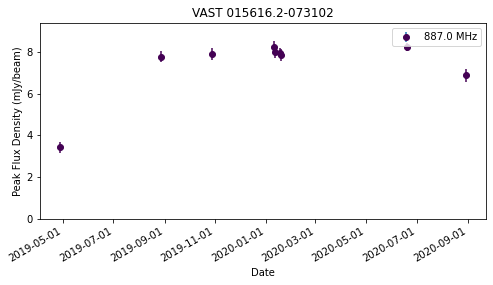

In [18]:
#plotting the light curve of that specific source
star_source.plot_lightcurve()

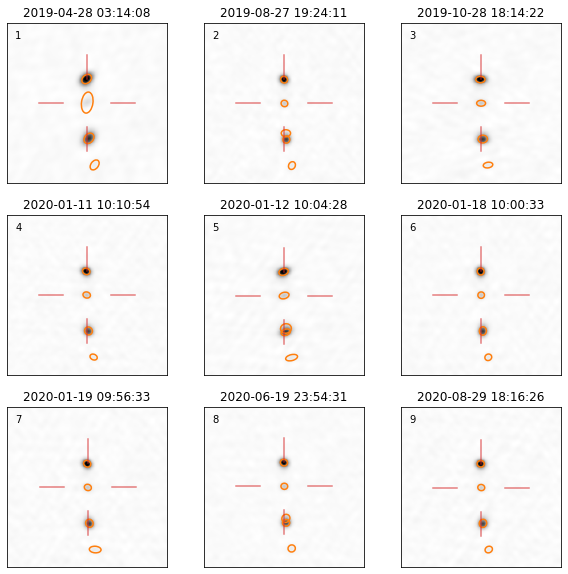

In [19]:
star_source.show_all_png_cutouts(columns=3, figsize=(10,10))

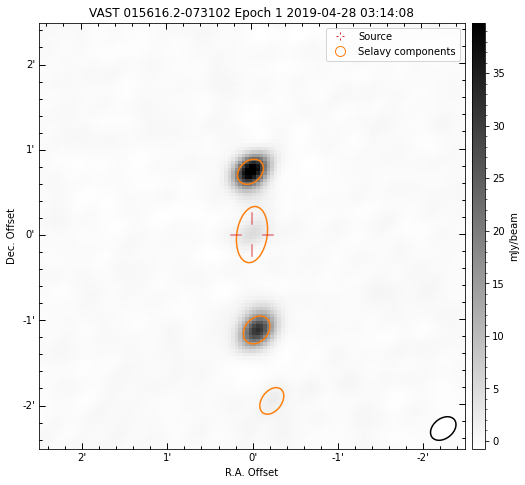

In [20]:
star_source.show_png_cutout('1')

OK! So ideally, we would have both the FINK and VAST lightcurves in the same notebook, I just need to figure out which imports are breaking the FINK Lightcurve plotting and wether or not that poses a problem here. Super ideally, I'd have them on the same plot!